In [1]:
from mcnptools import Mctal, MctalTally
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tally_folder = '../gettingtallies/compute/output/mctal/'
tally_file = tally_folder+'tnm_si.mctal'

In [3]:
m = Mctal(tally_file)
tfc = MctalTally.TFC

In [4]:
t6 = m.GetTally(6)
u_bins = t6.GetUBins()
print('u_bins', u_bins)
x = t6.GetEBins()
tfcbins = t6.GetTFCBins()
# switch 0s in tfc bins list to -1s
tfcbins = [1 if x == 0 else x for x in tfcbins]
tally_6 = np.zeros(tfcbins)
tfcbins = t6.GetTFCBins()
for u in range(tfcbins[2]):
    for e in range(tfcbins[6]):
        tally_6[0, 0, u, 0, 0, 0, e, 0] = t6.GetValue(tfc, tfc, u, tfc, tfc, tfc, e, tfc)

u_bins (-1.0, 2014000.0, 2006000.0, 2000000.0, 10000000000.0)


In [5]:
np.sum(tally_6[0, 0, :, 0, 0, 0, :, 0], axis=0).shape

(935,)

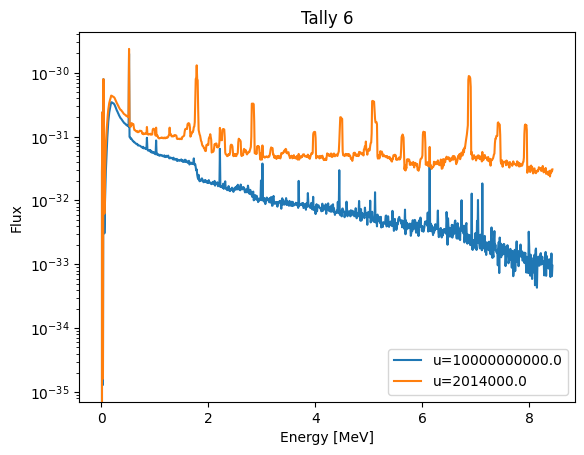

In [6]:
plt.figure()
for i in [-1, 1]:
    y = np.sum(tally_6[0, 0, i:, 0, 0, 0, :, 0], axis=0)
    label = f'u={u_bins[i]}'
    plt.plot(x, y, label=label)
plt.legend()
plt.yscale('log')
plt.title('Tally 6')
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux')
plt.show()

In [7]:
# do the same for tally 4
t4 = m.GetTally(4)
x = t4.GetEBins()
tfcbins = t4.GetTFCBins()
# switch 0s in tfc bins list to -1s
tfcbins = [1 if x == 0 else x for x in tfcbins]
tally_4 = np.zeros(tfcbins)
tfcbins = t4.GetTFCBins()
for u in range(tfcbins[2]):
    for e in range(tfcbins[6]):
        tally_4[0, 0, u, 0, 0, 0, e, 0] = t4.GetValue(tfc, tfc, u, tfc, tfc, tfc, e, tfc)

t4u_bins = t4.GetUBins()

In [8]:
t4.GetUBins()

(-1.0, 14000.0, 6000.0, 10000000000.0)

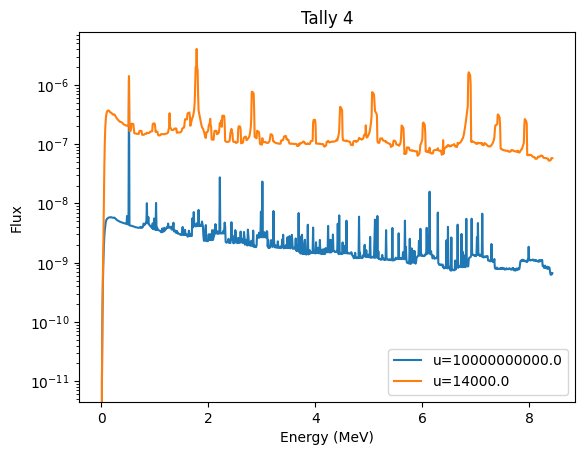

In [9]:
plt.figure()
for i in [-1, 1]:
    y = np.sum(tally_4[0, 0, i:, 0, 0, 0, :, 0], axis=0)
    label = f'u={t4u_bins[i]}'
    plt.plot(x, y, label=label)
plt.legend()
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux')
plt.title('Tally 4')
plt.show()

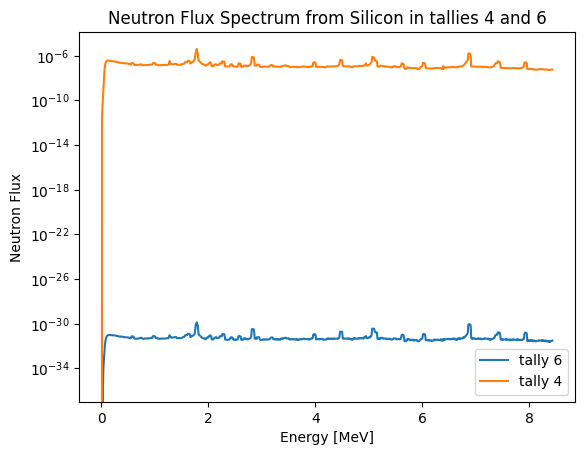

In [10]:
t6_spectrum_from_si = tally_6[0, 0, 1, 0, 0, 0, :]
t4_spectrum_from_si = tally_4[0, 0, 1, 0, 0, 0, :]
plt.figure()
plt.plot(x, t6_spectrum_from_si, label='tally 6')
plt.plot(x, t4_spectrum_from_si, label='tally 4')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Neutron Flux')
plt.title('Neutron Flux Spectrum from Silicon in tallies 4 and 6')
plt.yscale('log')
plt.show()

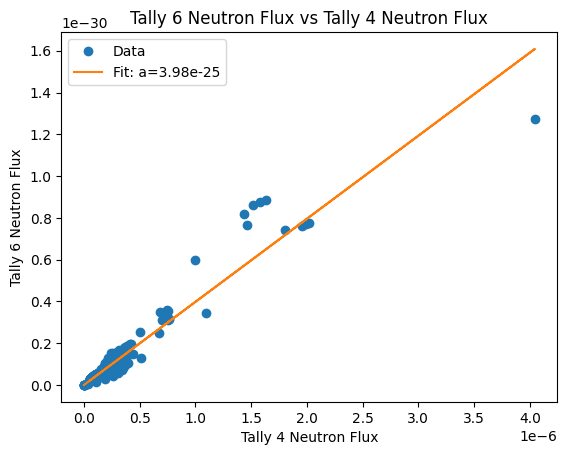

/tmp/ipykernel_763064/1954257396.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(x, to_fit(t4_spectrum_from_si, *popt), label='Fit: a=%.2e' % popt, linestyle='--')


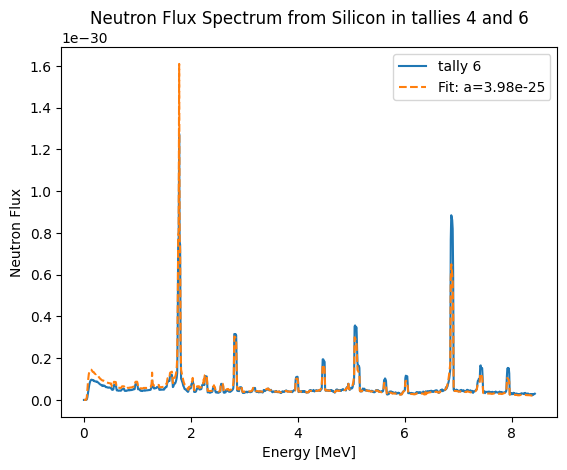

In [11]:
t6_spectrum_from_si = tally_6[0, 0, 1, 0, 0, 0, :].flatten()
t4_spectrum_from_si = tally_4[0, 0, 1, 0, 0, 0, :].flatten()



to_fit = lambda x, a: a * x 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(to_fit, t4_spectrum_from_si, t6_spectrum_from_si)

plt.figure()
plt.plot(t4_spectrum_from_si, t6_spectrum_from_si, 'o', label='Data')
plt.plot(t4_spectrum_from_si, to_fit(t4_spectrum_from_si, *popt), label='Fit: a=%.2e' % tuple(popt))
plt.legend()
plt.xlabel('Tally 4 Neutron Flux')
plt.ylabel('Tally 6 Neutron Flux')
plt.title('Tally 6 Neutron Flux vs Tally 4 Neutron Flux')
plt.show()

plt.figure()
plt.plot(x, t6_spectrum_from_si, label='tally 6')
# plt.plot(x, t4_spectrum_from_si, label='tally 4')
plt.plot(x, to_fit(t4_spectrum_from_si, *popt), label='Fit: a=%.2e' % popt, linestyle='--')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Neutron Flux')
plt.title('Neutron Flux Spectrum from Silicon in tallies 4 and 6')
# plt.yscale('log')
plt.show()


In [12]:
t8 = m.GetTally(18)

In [ ]:
t8.GetTFCBins()
t8tfcbins = t8.GetTFCBins()
t8tfcbins = [1 if x == 0 else x for x in t8tfcbins]
tally_8 = np.zeros(t8tfcbins)

In [16]:
t8.GetTFCBins()

(0, 0, 0, 0, 0, 0, 935, 0)

In [14]:

for e in range(tfcbins[6]):
    tally_8[0, 0, 0, 0, 0, 0, e, 0] = t8.GetValue(tfc, tfc, tfc, tfc, tfc, tfc, e, tfc)